# Pset1 1bc

In [2]:
from __future__ import print_function
import time, os, json
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Load

In [30]:
x = np.loadtxt('logistic_x.txt')
y = np.loadtxt('logistic_y.txt')

#x = np.insert(x, [0], np.ones((x.shape[0], 1)), axis=1)

print("x:", x.shape)
print("y:", y.shape)

x: (99, 2)
y: (99,)


## Plot points
Let's see the dataset before we transform it.

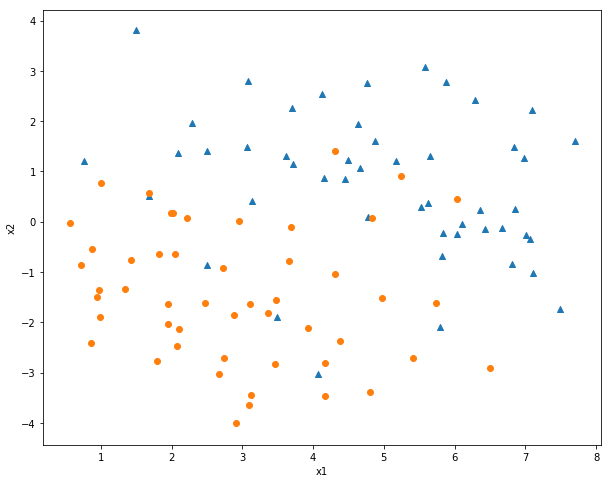

In [31]:
pos_x = x[y>0]
neg_x = x[y<0]

plt.ylabel('x2')
plt.xlabel('x1')

plt.scatter(pos_x[:,0],pos_x[:,1], marker='^')
plt.scatter(neg_x[:,0],neg_x[:,1])
plt.show()

## Define Functions

In [42]:
m = y.shape[0]
n = x.shape[1]

def gradient(theta):
    g = np.zeros((n,))
    for i in range(m):
        x_i = x[i]
        y_i = y[i]
        yx = np.dot(y_i, x_i)
        top = -1*yx
        yox = np.dot(np.dot(y_i, theta), x_i)
        bottom = (1 + np.exp(yox))**-1
        g = np.add(g, bottom*top)
    return g

def hessian(theta):
    h = np.zeros((n,n))
    for i in range(m):
        x_i = x[i]
        y_i = y[i]
        yx = np.dot(y_i, x_i)
        yx2 = np.outer(yx, yx)
        yox = np.dot(np.dot(y_i, theta), x_i)
        top = np.exp(yox)*yx2
        yoxp1 = (1 + yox)
        bottom = np.dot(yoxp1, yoxp1)**-1
        h = np.add(h, bottom*top)
    return h
        
def newton(z):
    z1 = z - np.dot(np.linalg.inv(hessian(z)), gradient(z))
    return z1

def hypothesis(theta):
    return (1 + np.exp(-np.dot(theta, x.T)))**-1

## Compute Theta

In [43]:
theta = np.zeros((n,))
print(theta)

for i in range(5):
    theta = newton(theta) 
    print(theta)

new_theta = theta

[ 0.  0.]
[[ 1888.85879293   -71.95741469]
 [  -71.95741469   319.73162183]]
[ 0.03205644  0.17900929]
[[ 1671.91843303   -88.30089821]
 [  -88.30089821   261.93320925]]
[ 0.06250264  0.34759674]
[[ 2002.679397    -149.30737584]
 [ -149.30737584   350.968837  ]]
[ 0.08261279  0.44195372]
[[ 1179355.19873669  -854268.64539049]
 [ -854268.64539049   642571.97871729]]
[ 0.08382789  0.44360753]
[[ 1156184.88937179  -798787.85498691]
 [ -798787.85498691   613869.98511984]]
[ 0.08427155  0.44422492]


Newton's method works so well it's almost not worth doing more than 2 iterations.

## Compute dividing line

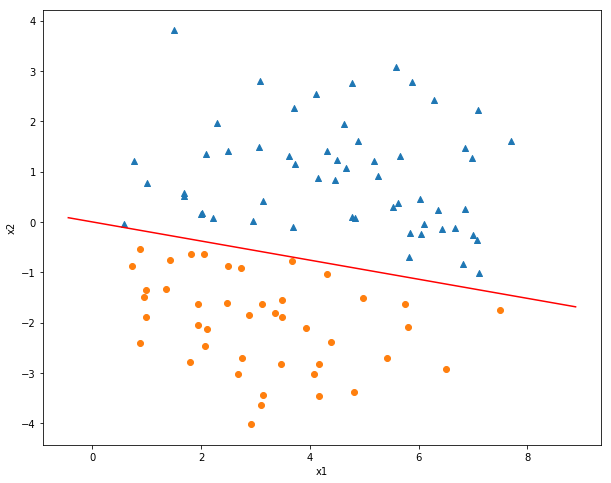

In [17]:
# Classified points
hyp = hypothesis(new_theta)
pos_x_c = x[hyp>0.5]
neg_x_c = x[hyp<=0.5]

# Solving the hypothesis for 0.5, we get that the dividing line will be where x is orthogonal to theta
# In 2d, this is easy to calculate by reversing and subtracting the first term
# We need at least two points to plot, so we use a multiple of the orthogonal theta point
ortho_theta = np.asarray([-new_theta[1], new_theta[0]])
ortho_points = np.asarray([ortho_theta, ortho_theta*-20])

plt.ylabel('x2')
plt.xlabel('x1')

plt.scatter(pos_x_c[:,0],pos_x_c[:,1], marker='^')
plt.scatter(neg_x_c[:,0],neg_x_c[:,1])
plt.plot(ortho_points[:,0], ortho_points[:,1], "r")
plt.show()

We can see that the dividing line separates the classified points. But how well did it do?

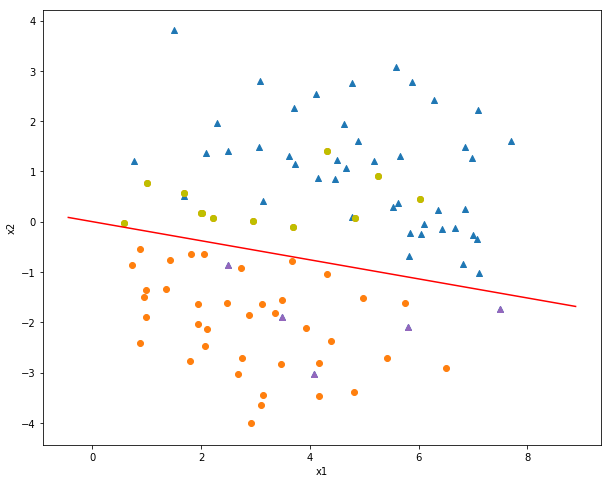

In [182]:
false_pos_ind = np.logical_and(hyp>0.5, y<=0.5)
false_neg_ind = np.logical_and(hyp<=0.5, y>0.5)
false_pos_x_c = x[false_pos_ind]
false_neg_x_c = x[false_neg_ind]

plt.ylabel('x2')
plt.xlabel('x1')

plt.scatter(pos_x[:,0],pos_x[:,1], marker='^')
plt.scatter(neg_x[:,0],neg_x[:,1])
plt.scatter(false_pos_x_c[:,0],false_pos_x_c[:,1], c='y')
plt.scatter(false_neg_x_c[:,0],false_neg_x_c[:,1], c='tab:purple', marker='^')
plt.plot(ortho_points[:,0], ortho_points[:,1], c='r')
plt.show()

Not too terrible. Those circles are pretty deep in the triangle forest.